# Auto Dataset - Unsupervised Learning

Data Description :
The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double
decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the
bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

Objective : 
Classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette.

In [1]:
#import data processing packages
import pandas as pd
import numpy as np

#import the visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import KFold, cross_val_score
from sklearn.decomposition import PCA
from sklearn import metrics

# import zscore
from scipy.stats import zscore

### 1. Load the data and explore

In [2]:
auto_data = pd.read_csv("vehicle.csv")

#### Shape of the data

In [3]:
auto_data.shape

(846, 19)

The data contains 846 records and 19 columns.

In [4]:
auto_data.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

#### Get the column names

In [5]:
auto_data.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [6]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

The data has all numerical attributes and the target attribute is the column 'class'.

In [7]:
# Get a count of the 'class' attribute
auto_data['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

There are 3 classes in the data - car, van and bus.

#### Check for missing values

In [8]:
auto_data.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

The data contains a lot of missing values for many attributes. This needs to be handled before model training.

#### Get some statistics for the numerical attributes

In [9]:
auto_data.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

### 2. Understanding the attributes

#### Get a distribution of each attribute in the data

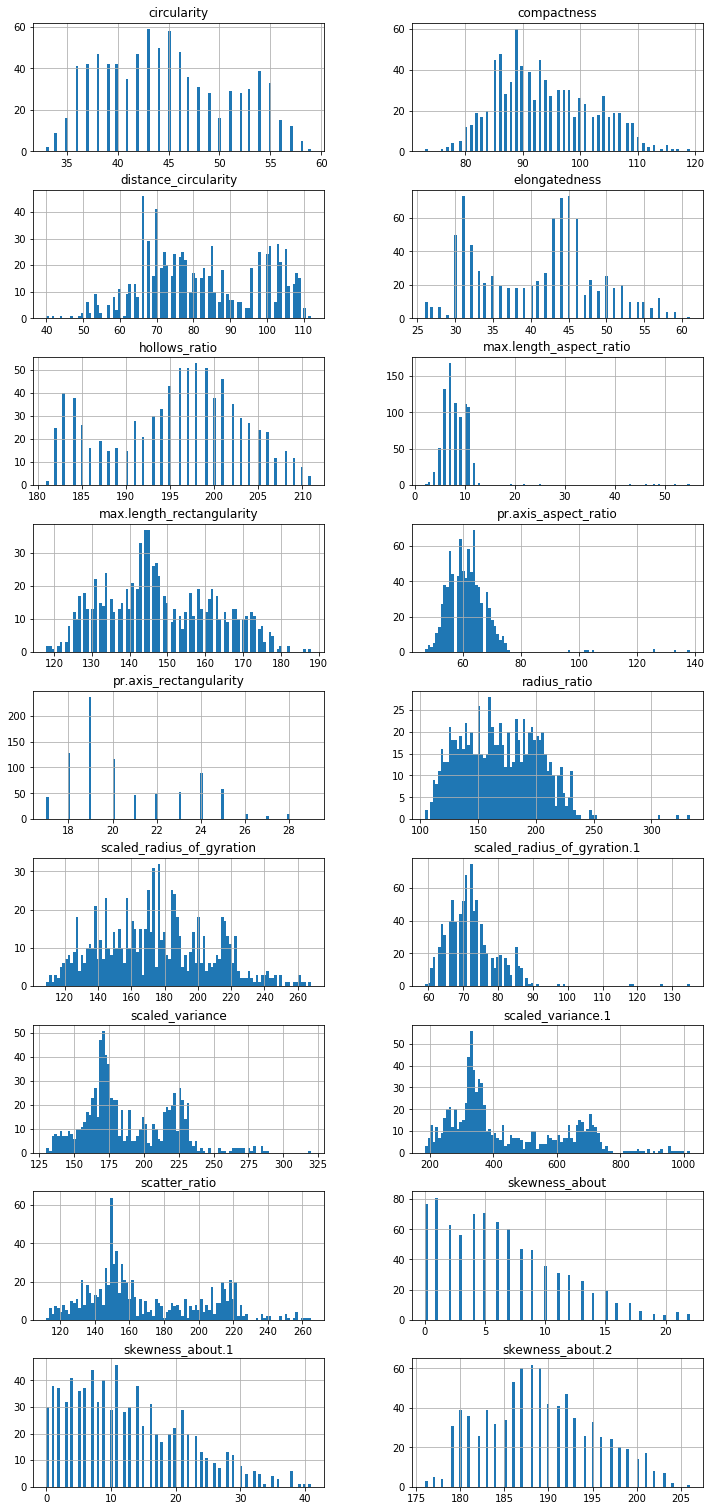

In [10]:
x_columns = list(auto_data.columns)
x_columns.remove('class')
auto_data[x_columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(10,2));

#### Analyze the correlation between attributes using Pairplot

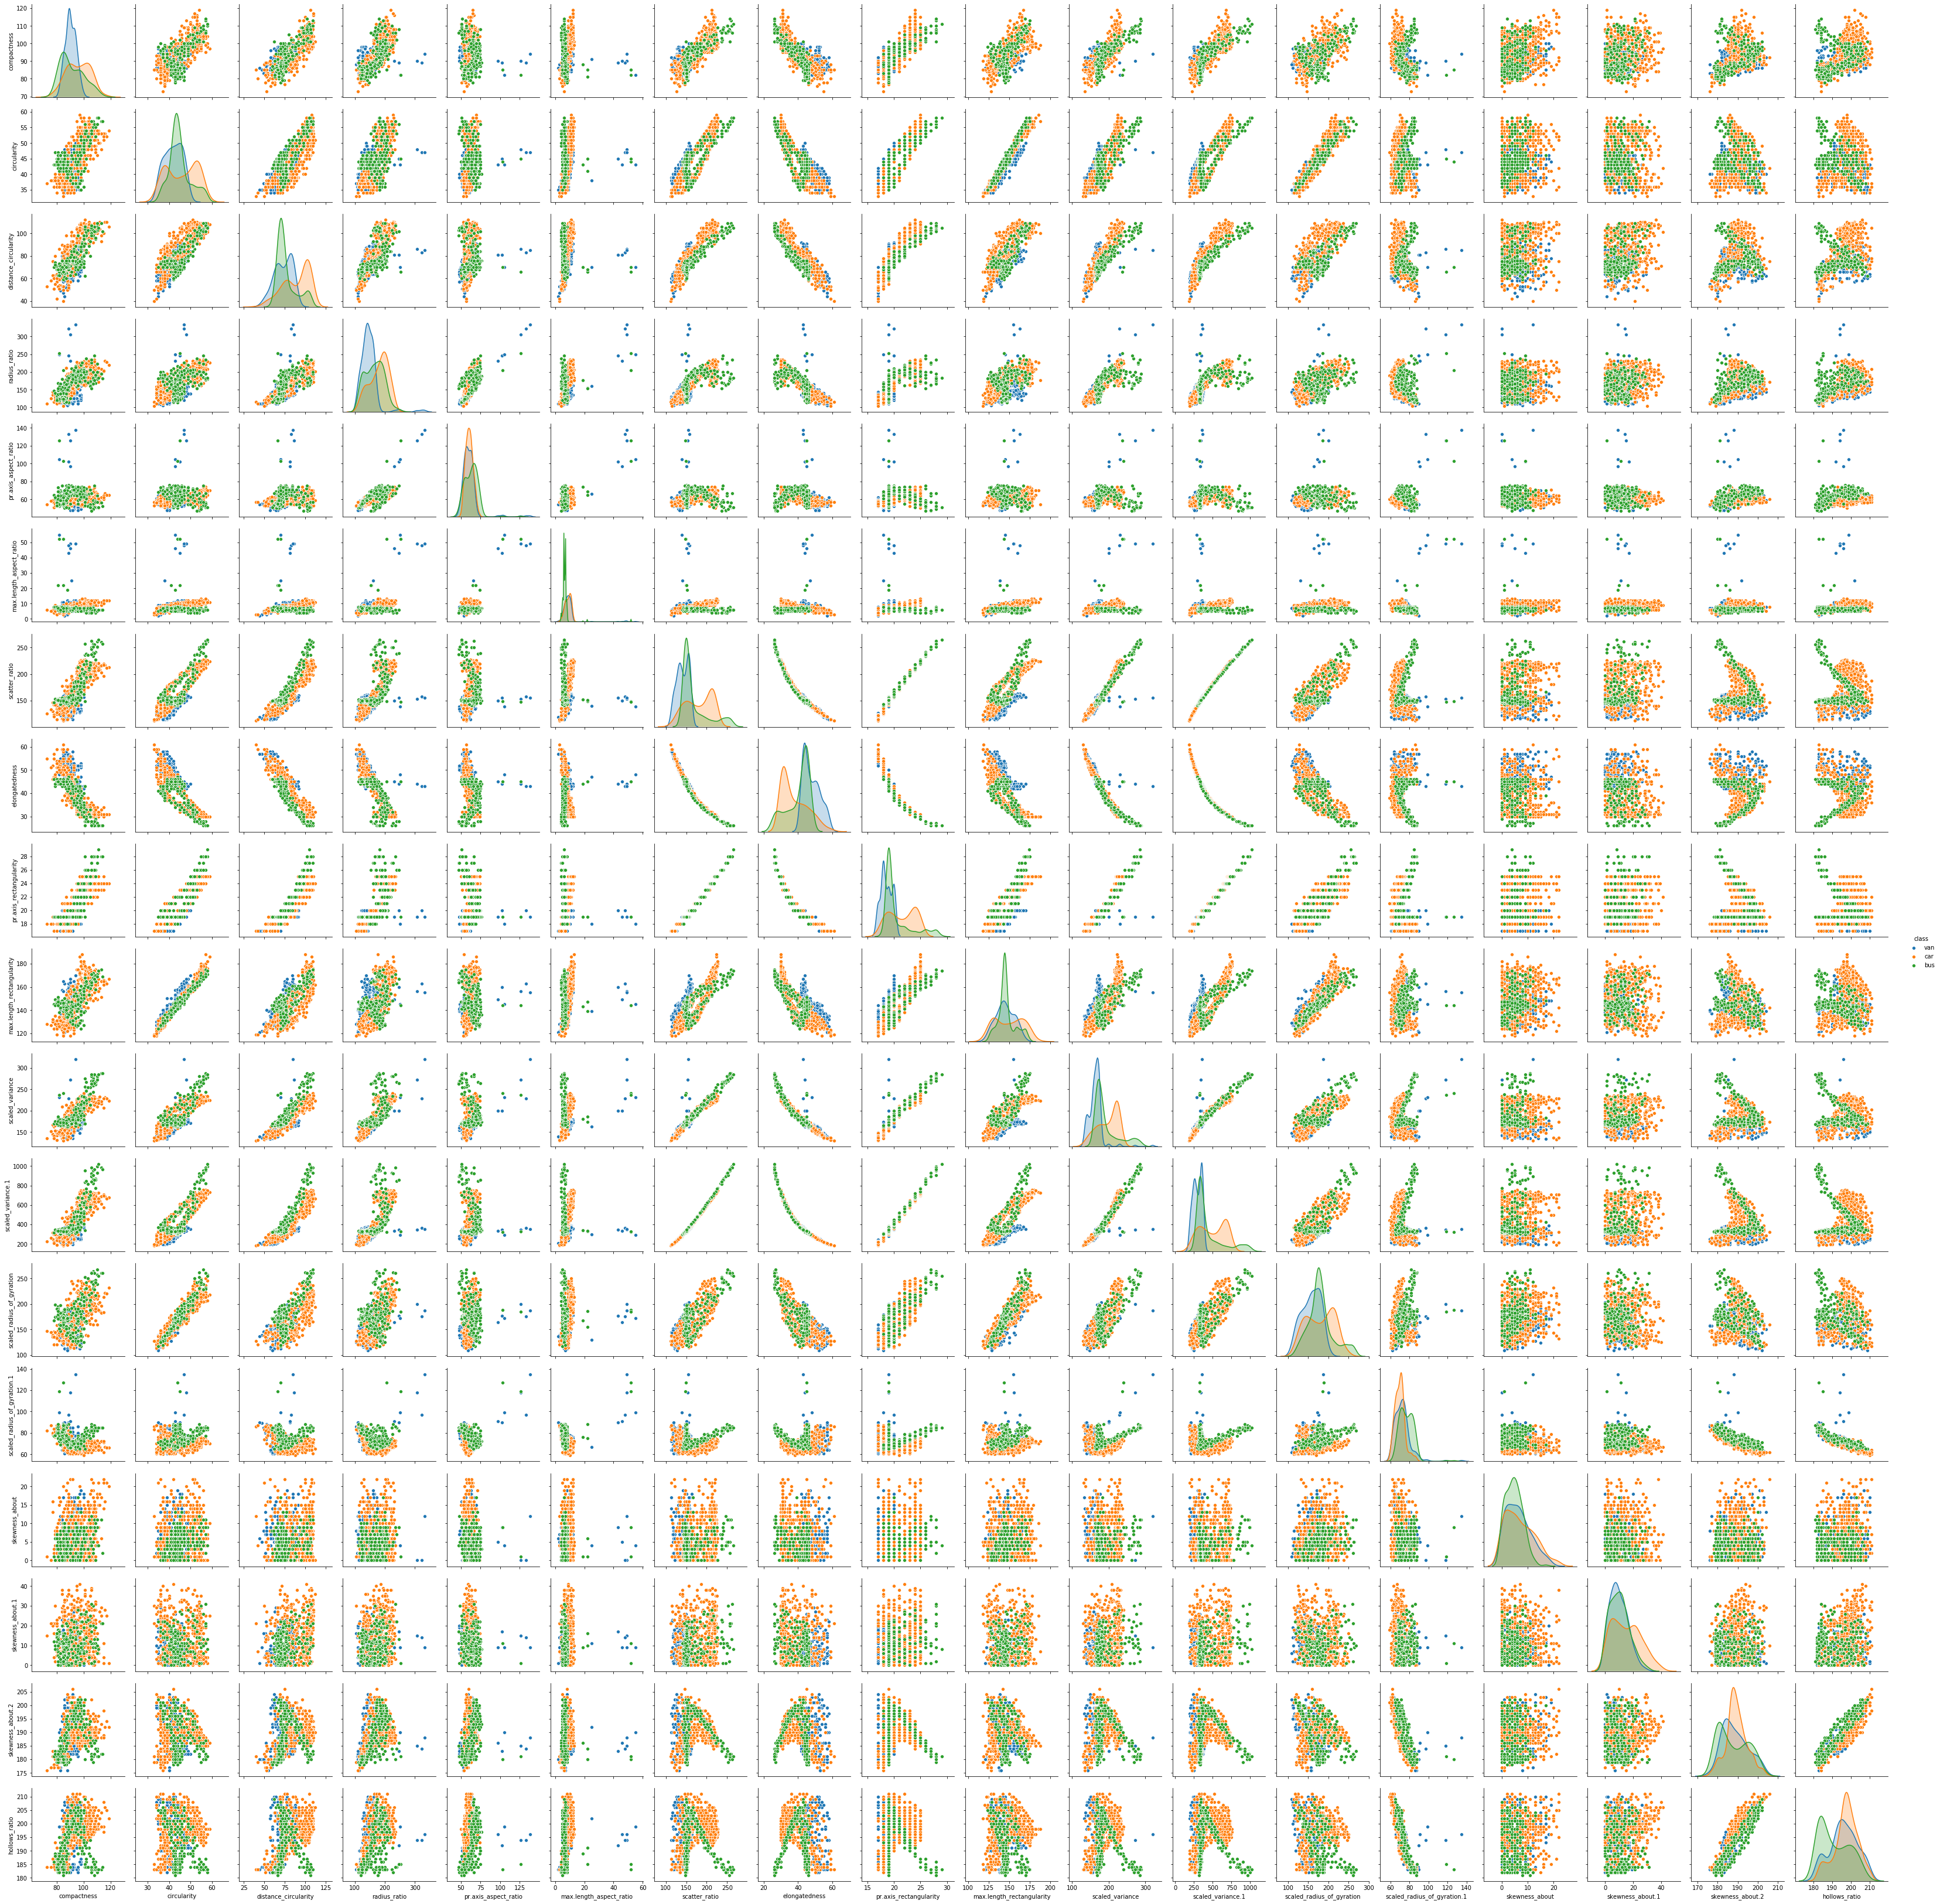

In [11]:
sns.pairplot(auto_data, diag_kind = 'kde', hue='class');

### Takeaways :
1. 'circularity' and 'max.length_rectangularity' have a very high positive correlation. 
2. 'scatter_ratio', 'scaled_variance.1' and 'pr.axis_rectangularity' are highly correlated.
3. 'elongatedness' is negatively correlated to 'scatter_ratio', 'scaled_variance.1' and 'pr.axis_rectangularity'.
4. 'circularity' has a positive correlation with 'scaled_variance', 'scaled_variance.1' and 'scaled_radius_of_gyration.
5. 'pr.axis_aspect_ratio' does not seem to vary much with respect to other attributes and most values range between 50 to 75.
6. 'max.length_aspect_ratio' also does not change much with respect to other attributes and most values are between 0 to 20.

#### Get the Correlation Matrix

In [12]:
corr = auto_data.corr()

In [13]:
def plot_corr(df, size=25):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

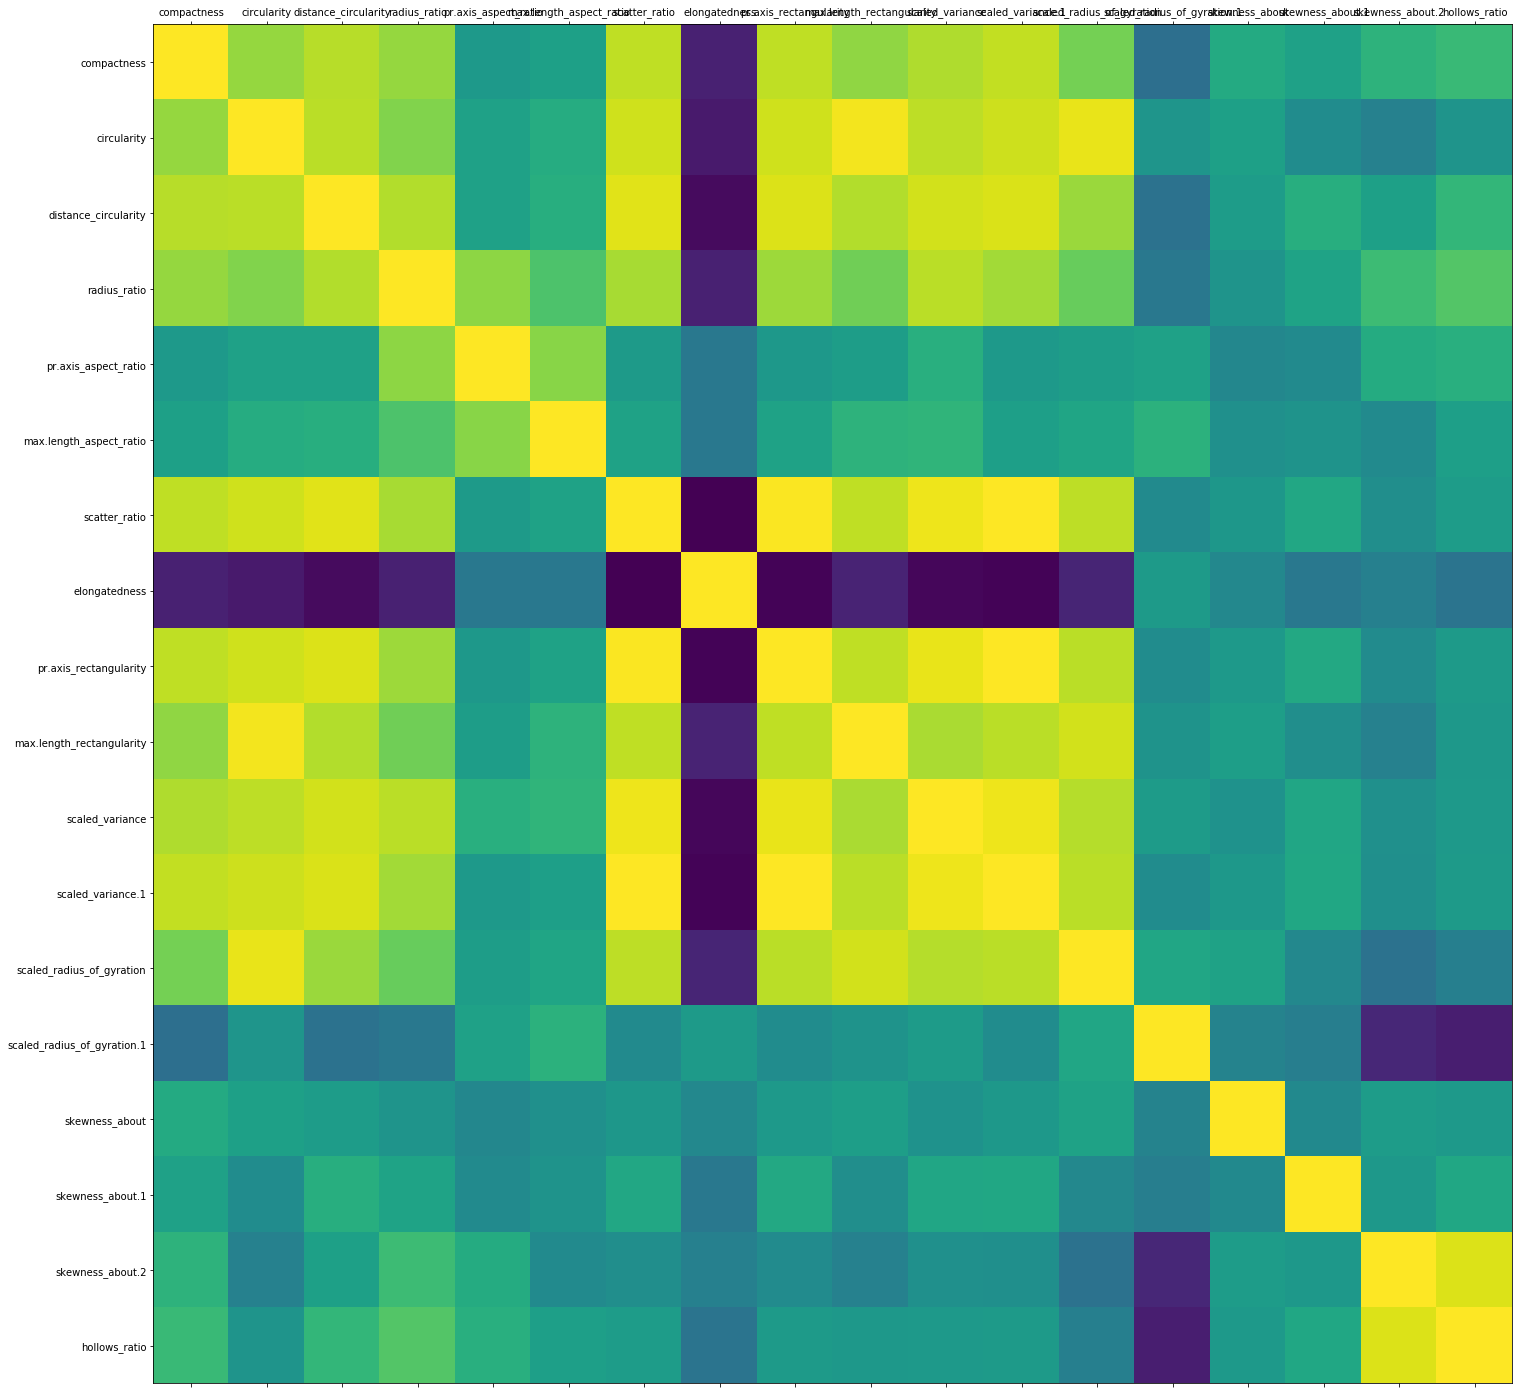

In [14]:
plot_corr(auto_data)

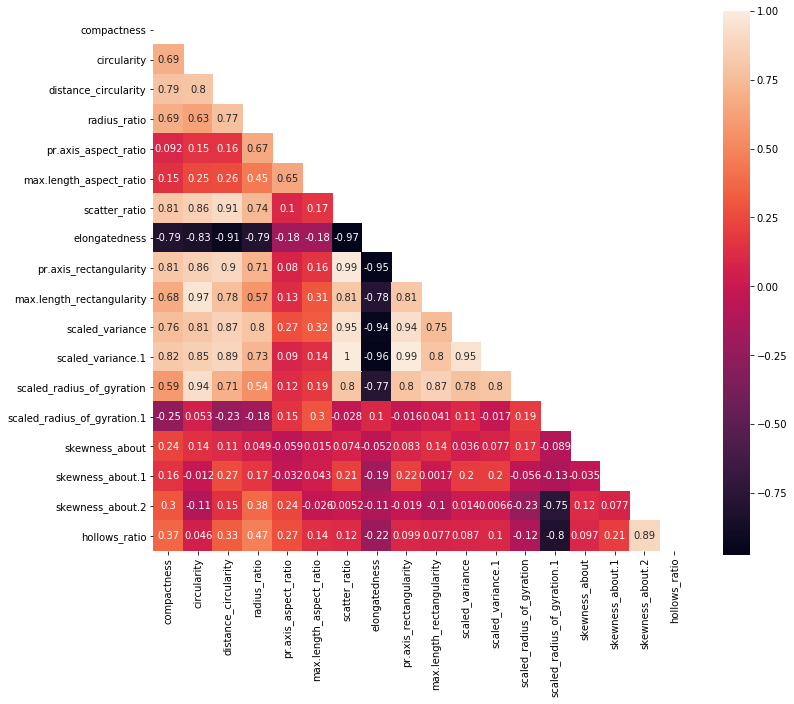

In [15]:
mask_corr = np.zeros_like(corr)
mask_corr[np.triu_indices_from(mask_corr)] = True

plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask_corr,annot=True,square=True)

### Takeaways :
1. By looking at the correlation matrix, we can see ~1 correlation for 'scatter_ratio', 'scaled_variance.1' and 'pr.axis_rectangularity'. Either one can be considered and the other two can be dropped. 
2. 'circularity' and 'max.length_rectangularity' also have very high correlation. One attribute can be dropped. 
3. 'elongatedness' has very high negative correlation with 'scatter_ratio'

### Some additional EDA on numerical attributes with target class

#### Distribution of 'circularity'

Text(0.5, 1.0, 'Distribution of circularity')

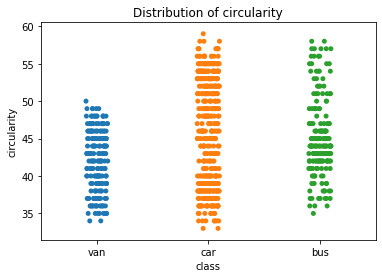

In [16]:
sns.stripplot(auto_data['class'], auto_data['circularity'], jitter=True);
plt.title("Distribution of circularity")

#### Takeaway : 
1. Circularity value for van is not more than 50. 
2. There is no clear distinction for circularity values for car and bus.

#### Distribution of 'scatter_ratio'

Text(0.5, 1.0, 'Distribution of scatter_ratio')

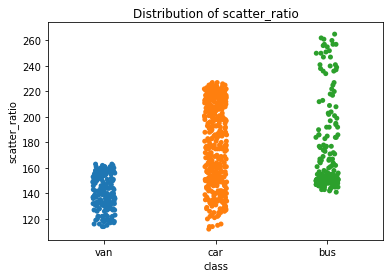

In [17]:
sns.stripplot(auto_data['class'], auto_data['scatter_ratio'], jitter=True);
plt.title("Distribution of scatter_ratio")

#### Takeaway : 
1. Scatter_ratio for van is the lowest and ranges between 120 to 160.
2. Scatter_ratio for car is between 120  to 220.
3. Scatter_ratio for bus is between 140 to 260. 
4. Scatter_ratio seems to be a good attribute to distinguish between van and bus, however, it is difficult to predict car. 

#### Distribution of 'elongatedness'

Text(0.5, 1.0, 'Distribution of elongatedness')

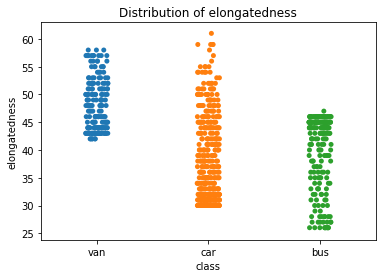

In [18]:
sns.stripplot(auto_data['class'], auto_data['elongatedness'], jitter=True);
plt.title("Distribution of elongatedness")

#### Takeaway : 
1. Elongatedness for van is the highest and ranges between 40 to 60.
2. Elongatedness for car is between 30  to 60.
3. Elongatedness for bus is between 25 to 45. 
4. Elongatedness also is a good indicator for van and bus, however, difficult to predict car. 

#### Distribution of 'compactness'

Text(0.5, 1.0, 'Distribution of compactness')

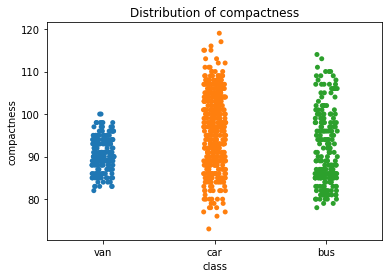

In [19]:
sns.stripplot(auto_data['class'], auto_data['compactness'], jitter=True);
plt.title("Distribution of compactness")

#### Takeaway : 
1. Compactness for van generally smaller and ranges between 80 to 100.
2. Compactness for car and bus is almost similar and ranges between 90 to 120.

#### Distribution of 'radius_ratio'

Text(0.5, 1.0, 'Distribution of radius_ratio')

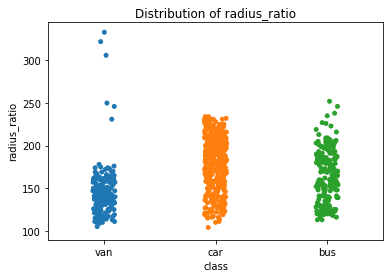

In [20]:
sns.stripplot(auto_data['class'], auto_data['radius_ratio'], jitter=True);
plt.title("Distribution of radius_ratio")

#### Takeaway : 
1. Max value for Radius_ratio for van is generally lower than car and bus. 
2. There are some cases where radius_ratio for van is higher than car and bus - these could be outliers.

#### Distribution of 'hollows_ratio'

Text(0.5, 1.0, 'Distribution of hollows_ratio')

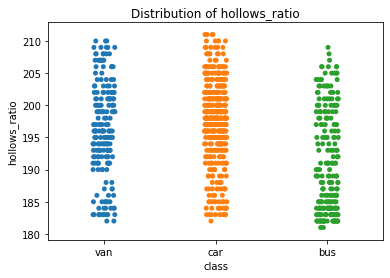

In [21]:
sns.stripplot(auto_data['class'], auto_data['hollows_ratio'], jitter=True);
plt.title("Distribution of hollows_ratio")

#### Takeaway : 
1. hollows_ratio for all three classes is nearly similar. This attribute may not be a clear indicator of the class. 

#### Final selection of attributes

In [22]:
# Drop highly correlated attributes
auto_data = auto_data.drop(["scaled_variance.1","pr.axis_rectangularity", "max.length_rectangularity"],axis=1)

In [23]:
# Final attributes selected in data
print(list(auto_data.columns))

['compactness', 'circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio', 'elongatedness', 'scaled_variance', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2', 'hollows_ratio', 'class']


### 3. Split data into train and test

In [24]:
X = auto_data.drop('class',axis=1)
Y = auto_data['class']

#### Impute missing values by filling with median

In [25]:
## Fill missing with median
medianFiller = lambda x: x.fillna(x.median())
X_imputed = X.apply(medianFiller,axis=0)


#### Split into 70:30 ratio for train and test set using sklearn

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X_imputed, Y, test_size=0.3, random_state=1)

x_train.head()

compactness  circularity  distance_circularity  radius_ratio  \
350           97         46.0                 101.0         210.0   
40            95         48.0                 104.0         214.0   
89            80         37.0                  57.0         116.0   
427           86         38.0                  89.0         176.0   
353           81         47.0                  69.0         146.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
350                  66.0                        8          192.0   
40                   67.0                        9          205.0   
89                   55.0                        6          125.0   
427                  59.0                        9          169.0   
353                  64.0                        6          151.0   

     elongatedness  scaled_variance  scaled_radius_of_gyration  \
350           35.0            208.0                      169.0   
40            32.0            227.0                      202.0   
89            54.0            142.0                      132.0   
427           39.0            190.0                      148.0   
353           44.0            171.0                      195.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
350                         66.0             1.0              32.0   
40                          74.0             5.0               9.0   
89                          81.0             8.0               5.0   
427                         67.0             7.0              33.0   
353                         75.0             5.0               0.0   

     skewness_about.2  hollows_ratio  
350             191.0            200  
40              186.0            193  
89              178.0            184  
427             193.0            202  
353             183.0            188

In [27]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(auto_data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(auto_data.index)) * 100))

69.98% data is in training set
30.02% data is in test set


### 4. Train and predict using Support Vector Machine

#### Fit the model

In [28]:
clf_svm = svm.SVC(gamma=0.025, C=3)  

In [29]:
clf_svm.fit(x_train , y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Predict on test set

In [30]:
y_pred = clf_svm.predict(x_test)
svm_score = clf_svm.score(x_test, y_test)
print("Model Accuracy on Test for SVM : {0:.4f}".format(svm_score))

Model Accuracy on Test for SVM : 0.5709


#### Confusion matrix for SVM on raw data

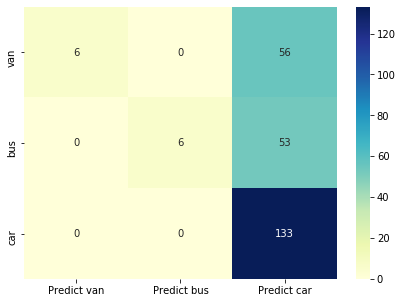

In [31]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=['van', 'bus','car'])

df_cm = pd.DataFrame(cm, index = [i for i in ['van', 'bus','car']],
                  columns = [i for i in ["Predict van","Predict bus", "Predict car"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,  cmap="YlGnBu" , fmt='g')

### 5. Perform  K-fold cross validation

In [32]:
# Set the number of folds
## 50 seems to be a reasonable number for the folds considering the data has nearly ~800 records. 
num_folds = 50

kfold = KFold(n_splits=num_folds, random_state=5)
model = svm.SVC(gamma=0.025, C=3)
results = cross_val_score(model, X_imputed, Y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

C:\Users\ujjwa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[0.23529412 0.52941176 0.52941176 0.47058824 0.47058824 0.58823529
 0.52941176 0.41176471 0.70588235 0.70588235 0.35294118 0.64705882
 0.52941176 0.47058824 0.52941176 0.70588235 0.35294118 0.35294118
 0.52941176 0.52941176 0.64705882 0.70588235 0.58823529 0.52941176
 0.64705882 0.70588235 0.41176471 0.58823529 0.70588235 0.76470588
 0.76470588 0.47058824 0.58823529 0.76470588 0.70588235 0.64705882
 0.58823529 0.58823529 0.64705882 0.52941176 0.47058824 0.64705882
 0.64705882 0.35294118 0.64705882 0.52941176 0.625      0.625
 0.75       0.5       ]
Accuracy: 57.118% (12.265%)


#### Takeaway : The model accuracy ranges between 45% to 69%.

### 6. Perform Principal Component Analysis

#### Scale the imputed data

In [33]:
XScaled=X_imputed.apply(zscore)
XScaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
4              5.245643                 9.444962      -0.599423   

   elongatedness  scaled_variance  scaled_radius_of_gyration  \
0       0.136262        -0.401920                   0.285705   
1       0.520519        -0.593357                  -0.513630   
2      -1.144597         1.097671                   1.392477   
3       0.648605        -0.912419                  -1.466683   
4       0.520519         1.671982                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   
2                     0.074587        1.558727         -0.403383   
3                    -1.265121       -0.073812         -0.291347   
4                     7.309005        0.538390         -0.179311   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

#### Generate the Covariance matrix

In [34]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.76297234  0.58593517 -0.24988794  0.23635777
   0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.79724837  0.92691166  0.05200785  0.14436828
  -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.86253904  0.70660663 -0.22621115  0.1140589
   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.79435372  0.53700678 -0.18061084  0.04877032
   0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.10385472 -0.18325156  0.27323306  0.12211524  0.15313091 -0.05843967
  -0.0320139   0.24016968  0.26804208]
 [ 0.14842463  0.25176438  0.26499957  0.45058426  0.64949139  1.0

#### Run PCA
There are 15 components in the data

In [35]:
pca = PCA(n_components=15)
pca.fit(XScaled)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

#### Get Eigen values

In [36]:
print(pca.explained_variance_)

[6.86756289 2.92755996 1.83810818 1.13017333 0.91333232 0.42357457
 0.34021896 0.20034195 0.15805279 0.05941938 0.05840048 0.04125592
 0.02870525 0.01882432 0.01222118]


#### Get Eigen vectors

In [37]:
print(pca.components_)

[[-0.32452912 -0.33123497 -0.35783392 -0.33289211 -0.12247947 -0.12967576
  -0.36194044  0.36489464 -0.35886087 -0.30426459  0.04376347 -0.05237019
  -0.07373056 -0.06808952 -0.11852275]
 [-0.08998653  0.1662337  -0.02773013 -0.13406772 -0.07973036  0.05035674
   0.09447096 -0.03542898  0.11715651  0.25075015  0.50536792 -0.05277084
  -0.11435116 -0.54088378 -0.53482589]
 [-0.15487088 -0.08271824 -0.09686107  0.25304706  0.64544336  0.58372538
  -0.14343923  0.10083911  0.01167203 -0.0944015   0.26296348 -0.14035353
  -0.06478415  0.03880062  0.06389655]
 [ 0.08084827  0.15227587 -0.08727393 -0.02224111  0.06813072  0.0386416
  -0.09542466  0.08236286 -0.10345736  0.18240482 -0.02812118  0.6445431
  -0.683802    0.10848244  0.02417762]
 [ 0.05408699 -0.09277775  0.03464311 -0.05630991 -0.04147258  0.22676007
  -0.02841083  0.09062777 -0.01553411 -0.07783616  0.13901661  0.70164624
   0.62721734 -0.101274   -0.01855816]
 [-0.0494625   0.26505674  0.21977966 -0.2919978  -0.37536069  0.63

#### Get the percentage of variation explained by each Eigen Vector

In [38]:
print(pca.explained_variance_ratio_)

[0.45729635 0.19493997 0.1223957  0.07525583 0.06081685 0.02820493
 0.02265445 0.01334034 0.0105244  0.00395661 0.00388876 0.00274714
 0.00191142 0.00125347 0.00081378]


#### Plot the variance

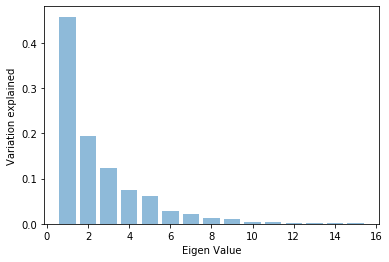

In [39]:
# For getting 95% variation, select alpha = 0.5
plt.bar(list(range(1,16)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.show()

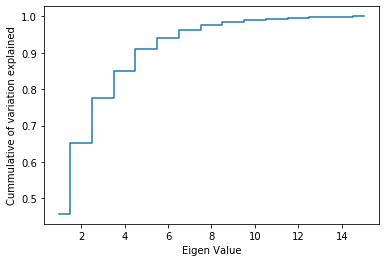

In [40]:
plt.step(list(range(1,16)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cummulative of variation explained')
plt.xlabel('Eigen Value')
plt.show()

#### Dimensionality Reduction using PCA

##### Considering 9 dimensions instead of 15 seems to be reasonable to explain over 95% of the variation in the original data

In [41]:
pca_selected = PCA(n_components=9)
pca_selected.fit(XScaled)
print(pca_selected.components_)
print(pca_selected.explained_variance_ratio_)
X_pca = pca_selected.transform(XScaled)

[[-0.32452912 -0.33123497 -0.35783392 -0.33289211 -0.12247947 -0.12967576
  -0.36194044  0.36489464 -0.35886087 -0.30426459  0.04376347 -0.05237019
  -0.07373056 -0.06808952 -0.11852275]
 [-0.08998653  0.1662337  -0.02773013 -0.13406772 -0.07973036  0.05035674
   0.09447096 -0.03542898  0.11715651  0.25075015  0.50536792 -0.05277084
  -0.11435116 -0.54088378 -0.53482589]
 [-0.15487088 -0.08271824 -0.09686107  0.25304706  0.64544336  0.58372538
  -0.14343923  0.10083911  0.01167203 -0.0944015   0.26296348 -0.14035353
  -0.06478415  0.03880062  0.06389655]
 [ 0.08084827  0.15227587 -0.08727393 -0.02224111  0.06813072  0.0386416
  -0.09542466  0.08236286 -0.10345736  0.18240482 -0.02812118  0.6445431
  -0.683802    0.10848244  0.02417762]
 [ 0.05408699 -0.09277775  0.03464311 -0.05630991 -0.04147258  0.22676007
  -0.02841083  0.09062777 -0.01553411 -0.07783616  0.13901661  0.70164624
   0.62721734 -0.101274   -0.01855816]
 [-0.0494625   0.26505674  0.21977966 -0.2919978  -0.37536069  0.63

In [42]:
X_Pca = pd.DataFrame(X_pca)

#### Perform bivariate analysis using Pairplot

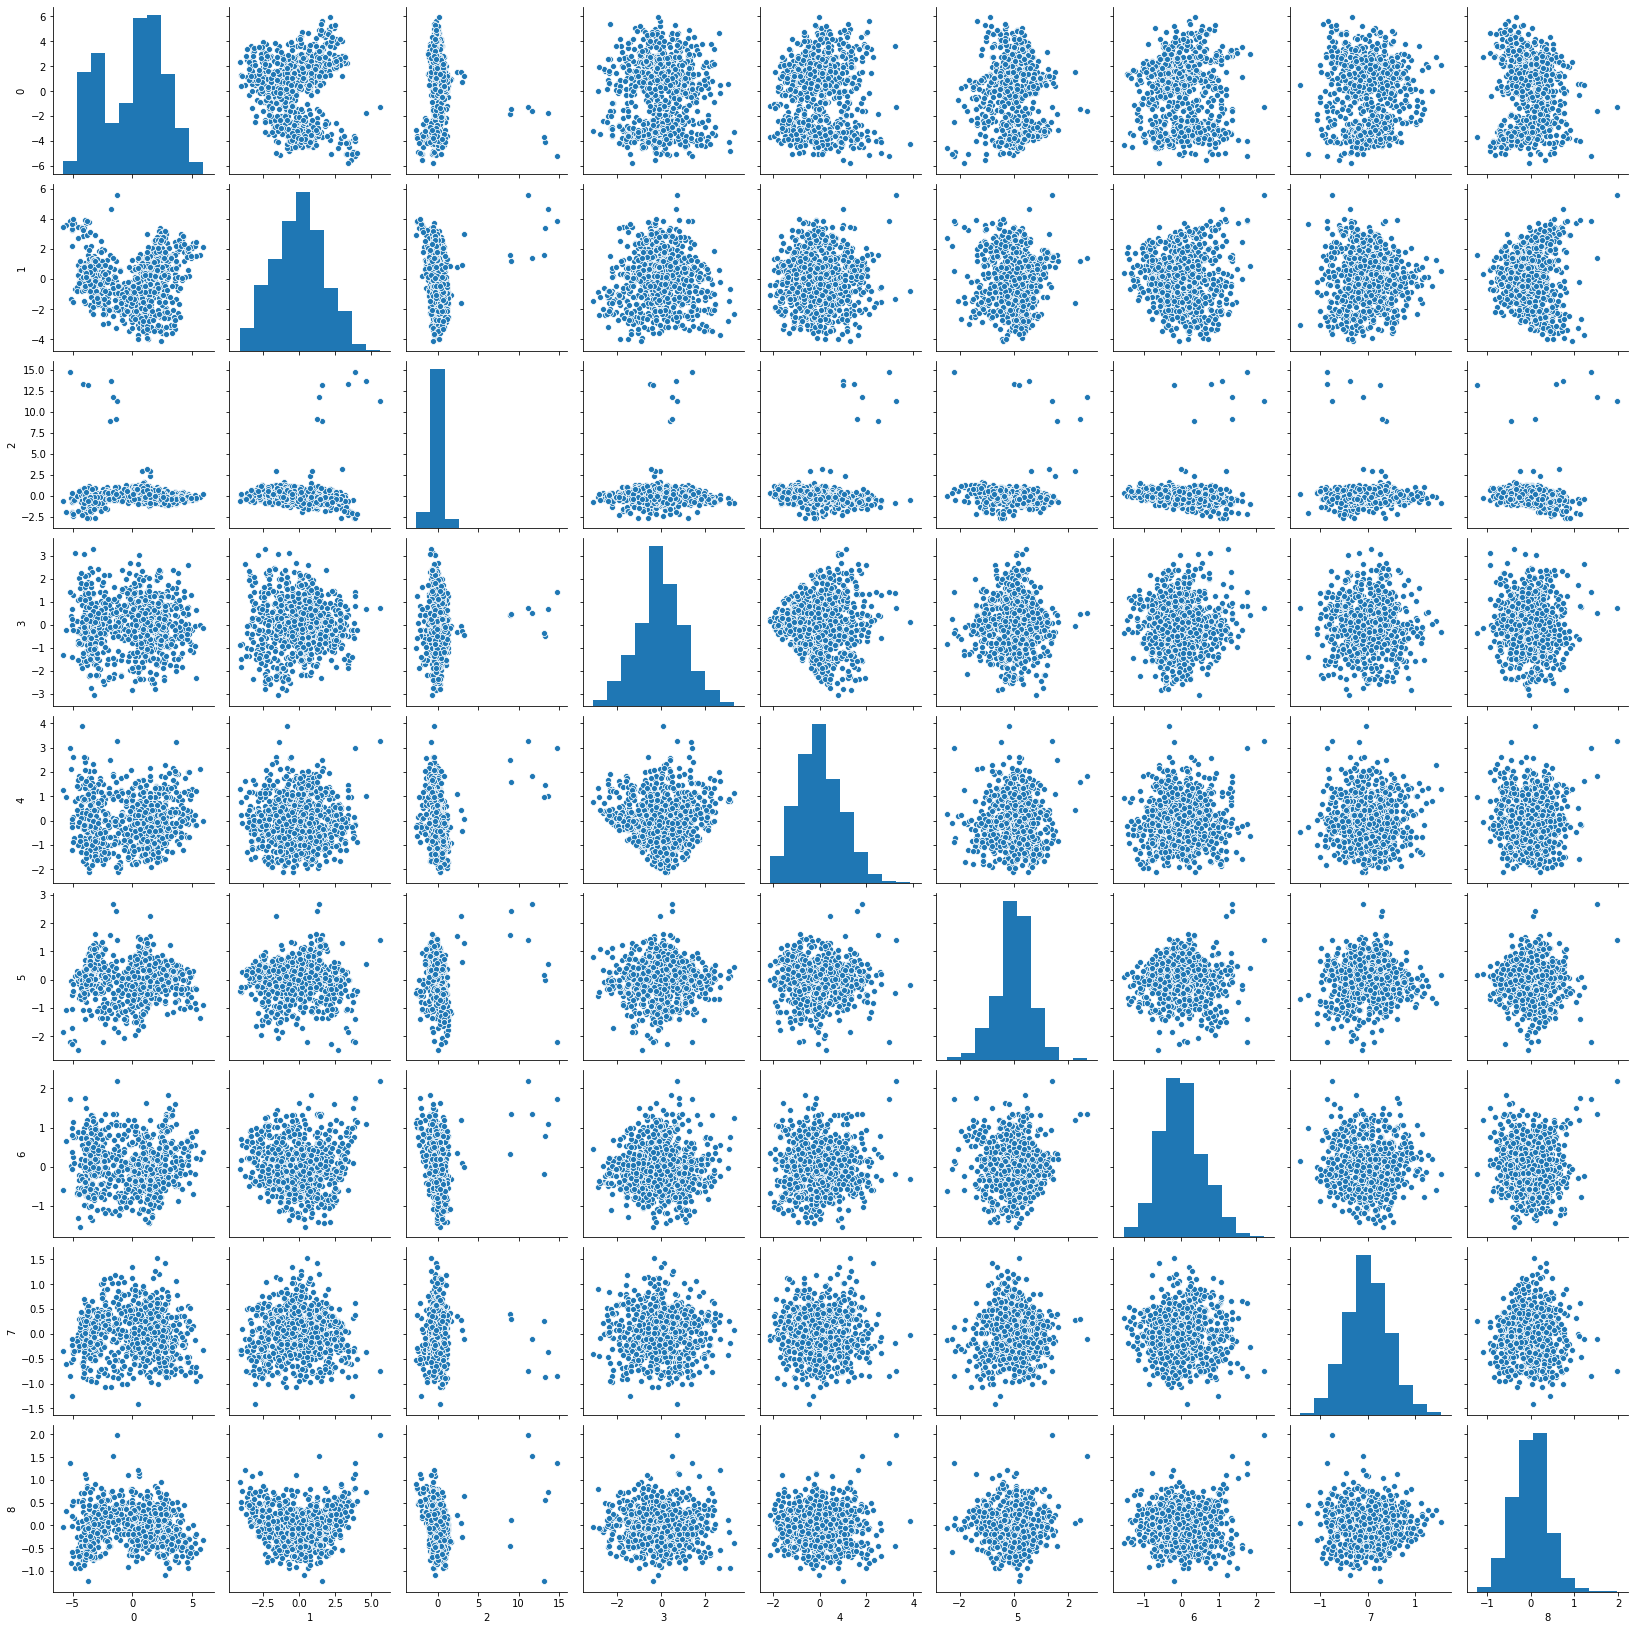

In [43]:
sns.pairplot(X_Pca)

### 7. Train and predict on SVM using components from PCA

#### Split into train and test using the same random_state in 70:30 ratio

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X_Pca, Y, test_size=0.3, random_state=1) # random state = 1

x_train.head()

0         1         2         3         4         5         6  \
350 -2.017489 -1.255941  0.082807 -2.379162  0.271213 -0.265014 -0.500108   
40  -2.645704  0.912326  0.373025 -0.151044 -0.657314 -0.488304 -0.199686   
89   4.660706  2.002199 -0.150419  0.479860  0.354215 -0.084890  0.185094   
427  0.261004 -1.755431 -0.141427 -1.848254  1.472439 -0.025345 -0.393454   
353  1.615606  1.705704  0.149942  0.918932 -1.150576 -0.058669 -1.234050   

            7         8  
350  0.274612 -0.463924  
40   1.006492 -0.054726  
89   0.552976 -0.283638  
427  0.804891  0.734593  
353  0.201316  0.111101

In [45]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(auto_data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(auto_data.index)) * 100))

69.98% data is in training set
30.02% data is in test set


#### Fit the model

In [46]:
clf_svm = svm.SVC(gamma=0.025, C=3)  

In [47]:
clf_svm.fit(x_train , y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Predict on test set

In [48]:
y_pred = clf_svm.predict(x_test)
svm_score_pca = clf_svm.score(x_test, y_test)
print("Model Accuracy on Test for SVM : {0:.4f}".format(svm_score_pca))

Model Accuracy on Test for SVM : 0.9409


#### Confusion matrix for SVM using PCA

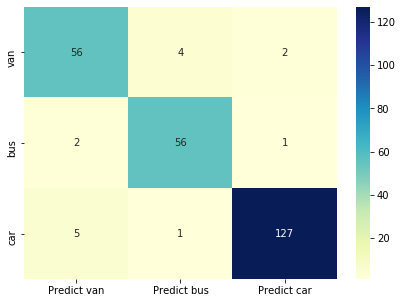

In [49]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=['van', 'bus','car'])

df_cm = pd.DataFrame(cm, index = [i for i in ['van', 'bus','car']],
                  columns = [i for i in ["Predict van","Predict bus", "Predict car"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,  cmap="YlGnBu" , fmt='g')

### 8. Summary

#### Accuracy for SVM using raw data = 57.09%
#### Accuracy for SVM using PCA dimensions = 94.09%
#### ------------------------------------------
#### The incorrect predictions for van and bus were too high in the first model using raw data. 
#### Number of van predicted as car  = 56
#### Number of bus predicted as car =  53
#### This suggests that the model was not able to differentiate between van, bus and car properly. 
#### ------------------------------------------
#### The incorrect predictions for all three classes is very low for the model trained using PCA (Max incorrect predictions is 5).
#### Also, the accuracy is very high compared to the SVM accuracy from raw data, with the use of less number of dimensions.
#### ------------------------------------------
#### Conclusion : The SVM model trained using the dimensions from PCA is clearly the better fit model in this case.  